# US Tornado Data 

### NOAA

https://www.ncdc.noaa.gov

## Storm Events Database

The Storm Events Database contains the records used to create the official NOAA Storm Data publication, documenting:

The occurrence of storms and other significant weather phenomena having sufficient intensity to cause loss of life, injuries, significant property damage, and/or disruption to commerce.
Rare, unusual, weather phenomena that generate media attention, such as snow flurries in South Florida or the San Diego coastal area; and
Other significant meteorological events, such as record maximum or minimum temperatures or precipitation that occur in connection with another event.

The database currently contains data from January 1950 to September 2021, as entered by NOAA's National Weather Service (NWS). Due to changes in the data collection and processing procedures over time, there are unique periods of record available depending on the event type. NCEI has performed data reformatting and standardization of event types but has not changed any data values for locations, fatalities, injuries, damage, narratives and any other event specific information.


### Import libraries and overview of datasets

In [1]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# importing libraries for GEO MAPPING the data
import folium as folium

### Import Dataset from CSV and create the data frame "df"

In [2]:
# loading both train and test datasets
df = pd.read_csv('tornadomaster.csv')

# Exploring the data

#### Cheching the data for row and colunmn counts

In [3]:
df.shape

(15949, 32)

As you can see we have 32 columns that consist of almost 16k rows of data

#### Check the data types

In [4]:
df.dtypes.value_counts()

int64      14
object     11
float64     7
dtype: int64

#### Describe the categorical data

In [5]:
df.describe(include=object).T

,count,unique,top,freq
STATE,15949,52,TEXAS,1453
MONTH,15949,12,May,3461
Tornado,15949,1,Tornado,15949
COUNTY_NAME,15949,1543,WASHINGTON,202
DAMAGE_PROPERTY,13760,409,0,5574
BEGIN_CUMPAS,15949,16,W,1266
BEGIN_LOCATION,15949,9515,EADS,16
END_CUMPAS,15949,16,N,1293
END_LOCATION,15949,9482,EADS,16
EPISODE_NARRATIVE,15949,5886,Favorable atmospheric conditions resulted in a...,72


In [6]:
# checking the columns and rows of the dataset
df.head()

,BEGIN_DAY,END_DAY,EPISODE_ID,EVENT_ID,STATE,STATE_NUM,YEAR,MONTH,Tornado,County_NUM,...,BEGIN_LOCATION,END_RANGE,END_CUMPAS,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE
0,30,30,46405,269045,LOUISIANA,22,2010,November,Tornado,97,...,SHUTESTON,1,NNE,SHUTESTON,30.4366,-92.1172,30.4405,-92.0965,A strong upper level storm system produced sca...,An NWS Storm Survey found a weak EF0 tornado t...
1,30,30,46362,268819,SOUTH CAROLINA,45,2010,November,Tornado,77,...,EASLEY,2,NNE,EASLEY,34.8290,-82.6050,34.8630,-82.5830,A strong cold front crossed the western Caroli...,A tornado damage path was surveyed starting in...
2,18,18,45236,262425,ARIZONA,4,2010,October,Tornado,15,...,(IGM)MOJAVE CO ARPT,4,SE,GETZ,35.2023,-113.9737,35.1859,-113.9821,Another very strong upper level low pressure s...,"An EF-0 tornado, with winds estimated at 75 mp..."
3,29,29,45412,263493,LOUISIANA,22,2010,November,Tornado,127,...,ATLANTA,0,SW,WINNFIELD JOYCE ARPT,31.7947,-92.8080,31.9479,-92.6528,A potent...upper level short wave accompanied ...,Numerous trees were snapped near the intersect...
4,29,29,45412,263494,LOUISIANA,22,2010,November,Tornado,73,...,LUNA,3,WSW,BOSCO,32.2802,-92.1872,32.2864,-92.1248,A potent...upper level short wave accompanied ...,The tornado touched down in an inaccessible wo...


### Cheching the data values

In [7]:
# checking the data values such as min, mean, max, and standard deviations.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BEGIN_DAY,15949.0,17.209919,8.739583,1.0000,10.0000,18.0000,25.0000,31.0000
END_DAY,15949.0,17.212302,8.740056,1.0000,10.0000,18.0000,25.0000,31.0000
EPISODE_ID,15949.0,98821.742742,37559.933788,35101.0000,62012.0000,101889.0000,132645.0000,163118.0000
EVENT_ID,15949.0,595562.463979,227599.890931,202850.0000,374103.0000,610234.0000,796406.0000,984848.0000
STATE_NUM,15949.0,27.969089,14.959107,1.0000,18.0000,28.0000,40.0000,99.0000
YEAR,15949.0,2015.328923,3.499655,2010.0000,2012.0000,2015.0000,2018.0000,2021.0000
County_NUM,15949.0,102.080005,90.236268,1.0000,41.0000,85.0000,133.0000,810.0000
INJURIES_DIRECT,15949.0,0.740861,14.046989,0.0000,0.0000,0.0000,0.0000,1150.0000
INJURIES_INDIRECT,15949.0,0.014609,0.809385,0.0000,0.0000,0.0000,0.0000,90.0000
DEATHS_DIRECT,15949.0,0.062574,1.450581,0.0000,0.0000,0.0000,0.0000,158.0000


### As you can see, we have some key information here that we can simply calculate from the csv

  - The mean day from most tornadoes is the 17th day of the month
  - We show the minimum date for events is 2010 and the max is 2021 showing the data range of data
  - We can see that the maximum deaths are 158 from a single tornado
  - Distance a tornado has travelled is a little as 0.01 miles to 41.8 miles
  - Maximum width of a tornado has been recorded to be 4576 feet wide!


## Check for data type and for missing data

In [8]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15949 entries, 0 to 15948
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BEGIN_DAY          15949 non-null  int64  
 1   END_DAY            15949 non-null  int64  
 2   EPISODE_ID         15949 non-null  int64  
 3   EVENT_ID           15949 non-null  int64  
 4   STATE              15949 non-null  object 
 5   STATE_NUM          15949 non-null  int64  
 6   YEAR               15949 non-null  int64  
 7   MONTH              15949 non-null  object 
 8   Tornado            15949 non-null  object 
 9   County_NUM         15949 non-null  int64  
 10  COUNTY_NAME        15949 non-null  object 
 11  INJURIES_DIRECT    15949 non-null  int64  
 12  INJURIES_INDIRECT  15949 non-null  int64  
 13  DEATHS_DIRECT      15949 non-null  int64  
 14  DEATHS_INDIRECT    15949 non-null  int64  
 15  DAMAGE_PROPERTY    13760 non-null  object 
 16  DAMAGE_CROPS       132

### Check for % of missing data in Columns 

In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
DAMAGE_CROPS,2691,0.168725
DAMAGE_PROPERTY,2189,0.137250
TOR_F_SCALE,607,0.038059
EPISODE_NARRATIVE,0,0.000000
END_LON,0,0.000000
END_LAT,0,0.000000
BEGIN_LON,0,0.000000
BEGIN_LAT,0,0.000000
END_LOCATION,0,0.000000
END_CUMPAS,0,0.000000


As you can see Damaged Crops, Poperty and TOR_F_SCALE has a small amout of missing information

### Clean and prep the data

In [10]:
# Let's drop some unnecessary columns
df = df.drop(['EPISODE_ID','EVENT_ID','END_CUMPAS','END_RANGE','BEGIN_LOCATION','BEGIN_CUMPAS','BEGIN_RANGE','COUNTY_NAME','County_NUM', ], axis=1)

Above we have dropped the columns we will not be using in this model

In [11]:
# recheck the shape
df.shape

(15949, 23)

As you can see we went from 32 column to 22 columns

# Basic Visualization

### TEXT - Yes organizing data in text format is a way of visualizing the data

In [12]:
### take note this is cool

df.groupby('TOR_F_SCALE').agg({'DEATHS_DIRECT':['min','max','mean','std']})

DEATHS_DIRECT                           
                      min  max       mean        std
TOR_F_SCALE                                         
0.0                     0    1   0.000512   0.022619
1.0                     0    3   0.005764   0.092811
2.0                     0    8   0.077922   0.443155
3.0                     0   12   0.597500   1.401930
4.0                     0   44   3.170000   6.040361
5.0                     0  158  24.333333  43.298821

### Here we compare deaths to the scale of a tornado showing the minimum and maximum deaths with the mean and standard deveation.   We can see in a EF4 tonado the total deaths were 44 and for a EF5 tornado the total deaths were 158 

In [13]:
### take note this is cool

df.groupby('TOR_F_SCALE').agg({'TOR_WIDTH':['min','max','mean','std']})

TOR_WIDTH                               
                  min   max         mean         std
TOR_F_SCALE                                         
0.0                 1  1400    76.683941  100.331084
1.0                 2  3221   232.872298  257.271173
2.0                10  3221   453.831169  408.678645
3.0                40  4576   839.807500  595.942648
4.0               150  3960  1172.280000  728.239805
5.0               900  2200  1433.333333  421.195988

In [14]:
df.groupby('TOR_F_SCALE').agg({'TOR_LENGTH':['min','max','mean','std']})

TOR_LENGTH                             
                   min    max       mean        std
TOR_F_SCALE                                        
0.0               0.01  32.88   1.498398   2.152656
1.0               0.01  31.38   3.707686   3.738249
2.0               0.02  32.58   6.967252   5.755387
3.0               0.51  41.88  11.274225   7.843816
4.0               0.61  41.79  14.136900   8.667937
5.0               2.89  39.60  16.819167  12.072368

In [15]:
df.groupby('TOR_F_SCALE').agg({'INJURIES_DIRECT':['min','max','mean','std']})

INJURIES_DIRECT                              
                        min   max        mean         std
TOR_F_SCALE                                              
0.0                       0    20    0.020218    0.324892
1.0                       0    48    0.106268    0.908070
2.0                       0   119    1.356801    5.366445
3.0                       0   200    8.547500   19.274504
4.0                       0   800   40.520000  117.824341
5.0                       0  1150  134.333333  326.517808

In [16]:
df.groupby('STATE')['DEATHS_DIRECT'].sum().to_frame().reset_index()

,STATE,DEATHS_DIRECT
0,ALABAMA,291
1,ARIZONA,0
2,ARKANSAS,40
3,CALIFORNIA,0
4,COLORADO,0
5,CONNECTICUT,0
6,DELAWARE,0
7,DISTRICT OF COLUMBIA,0
8,FLORIDA,3
9,GEORGIA,42


Observations:
    - even though Texas has the largest count of tornados Alabama and MO 

### BAR CHART - lets look at some tornado activity by state 

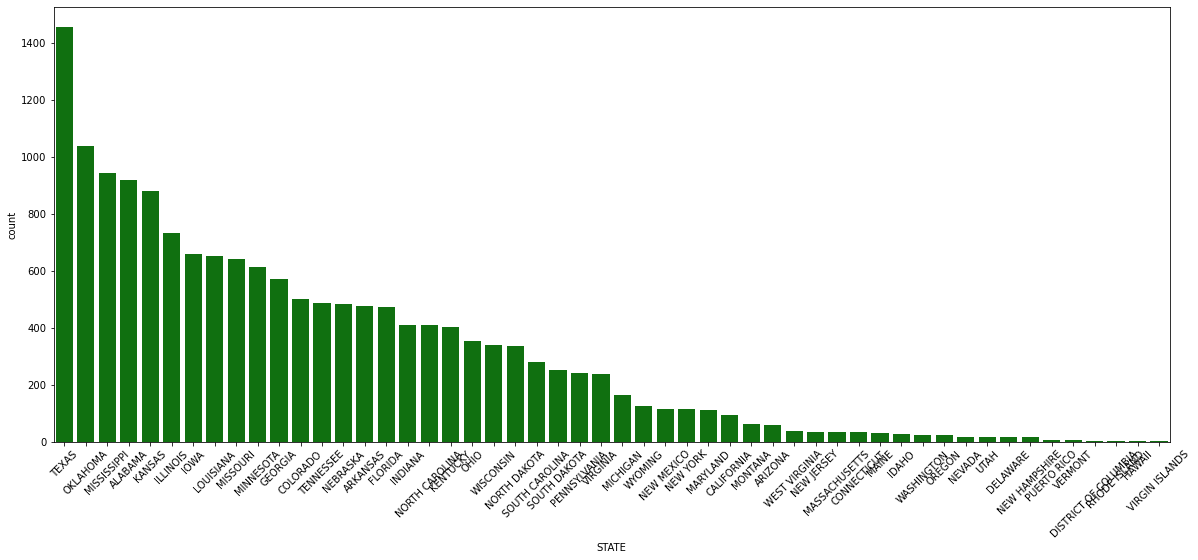

In [17]:
fig= plt.figure(figsize=(20,8))
sns.countplot(x='STATE', data=df, color='green', order=df['STATE'].value_counts().index);
plt.xticks(rotation=45);

### As we can see the scale of tornado count by states from 2010 to 2021
   - Texas > 3400
   - Oklahoma > 3000
   - Mississippi < 3000
   - Alabama < 3000
   - Illinois < 3000

### Bar Chart Cluster

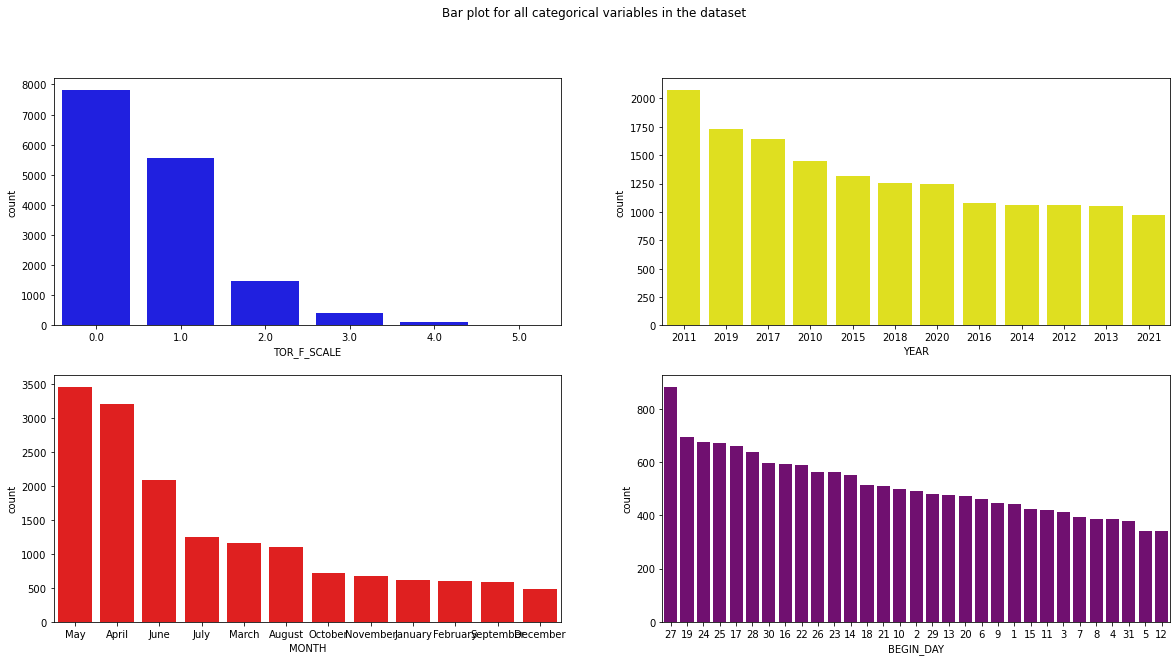

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
  
fig.suptitle('Bar plot for all categorical variables in the dataset')
  

sns.countplot(ax=axes[0, 0], x='TOR_F_SCALE', data=df, color='blue', 
              order=df['TOR_F_SCALE'].value_counts().index, );

sns.countplot(ax=axes[0, 1], x='YEAR', data=df, color='yellow', 
              order=df['YEAR'].value_counts().index);

sns.countplot(ax=axes[1, 0], x='MONTH', data=df, color='red', 
              order=df['MONTH'].value_counts(1000).index);

sns.countplot(ax=axes[1, 1], x='BEGIN_DAY', data=df, color='purple', 
              order=df['BEGIN_DAY'].value_counts(1000).index);

#### Observations:

  - approximately 5500 tornados were recorded to be an EF1 and < 1000 EF3, EF4, and EF5
  - 2011 had the largest outbreak with > than 2000 tornados occurring 
  - May, April, June are the Peak for tornado season
  - Most tornados begin on the 27th day of the month

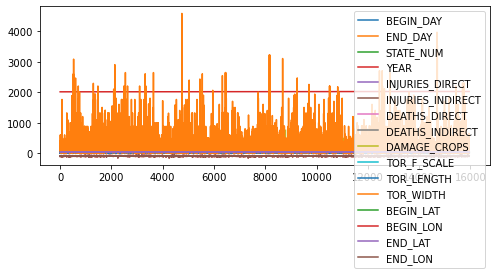

In [19]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Make a list of columns
columns = ['DEATHS_DIRECT', 'INJURIES_DIRECT','TOR_F_SCALE']

# Plot the lines
df.plot()

plt.show()

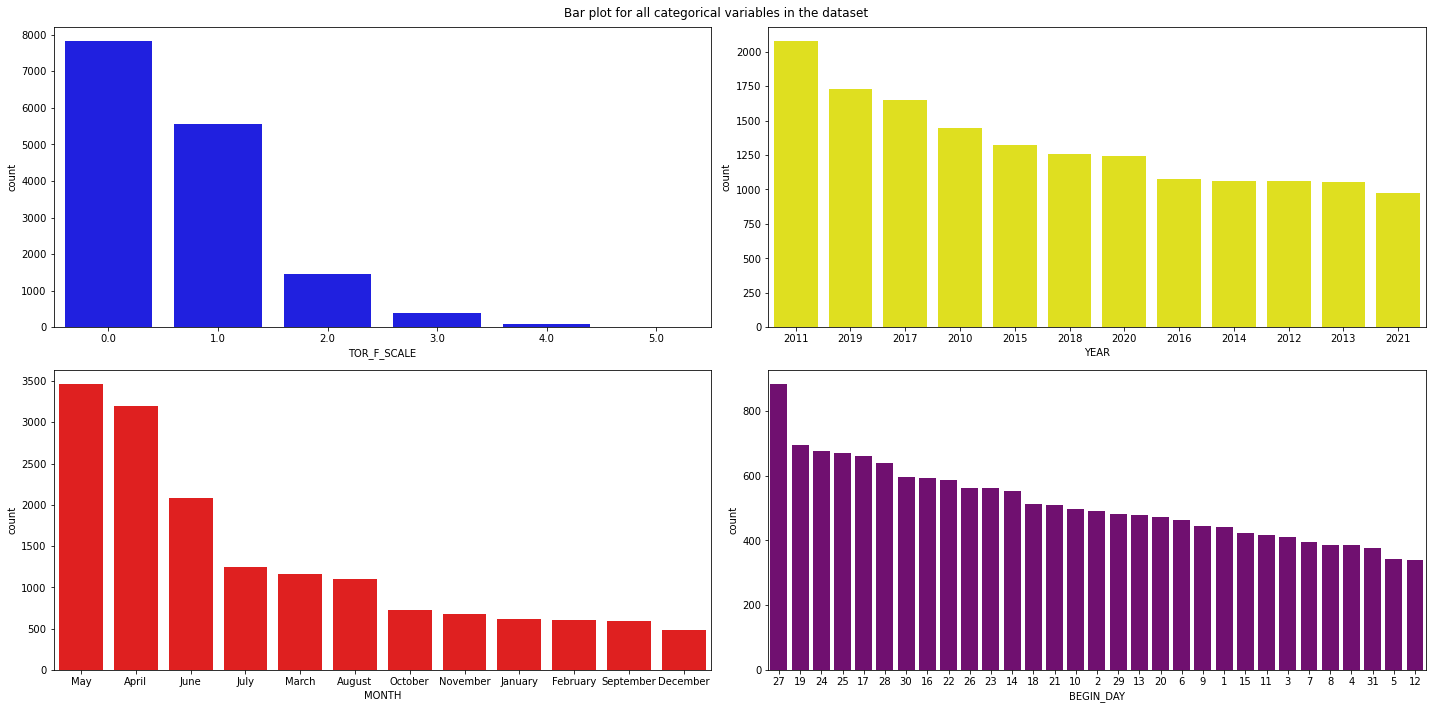

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
  
fig.suptitle('Bar plot for all categorical variables in the dataset')
  

sns.countplot(ax=axes[0, 0], x='TOR_F_SCALE', data=df, color='blue', 
              order=df['TOR_F_SCALE'].value_counts().index, );

sns.countplot(ax=axes[0, 1], x='YEAR', data=df, color='yellow', 
              order=df['YEAR'].value_counts().index);

sns.countplot(ax=axes[1, 0], x='MONTH', data=df, color='red', 
              order=df['MONTH'].value_counts().index);

sns.countplot(ax=axes[1, 1], x='BEGIN_DAY', data=df, color='purple', 
              order=df['BEGIN_DAY'].value_counts(1000).index);

### Seaborn and Scatter Plots

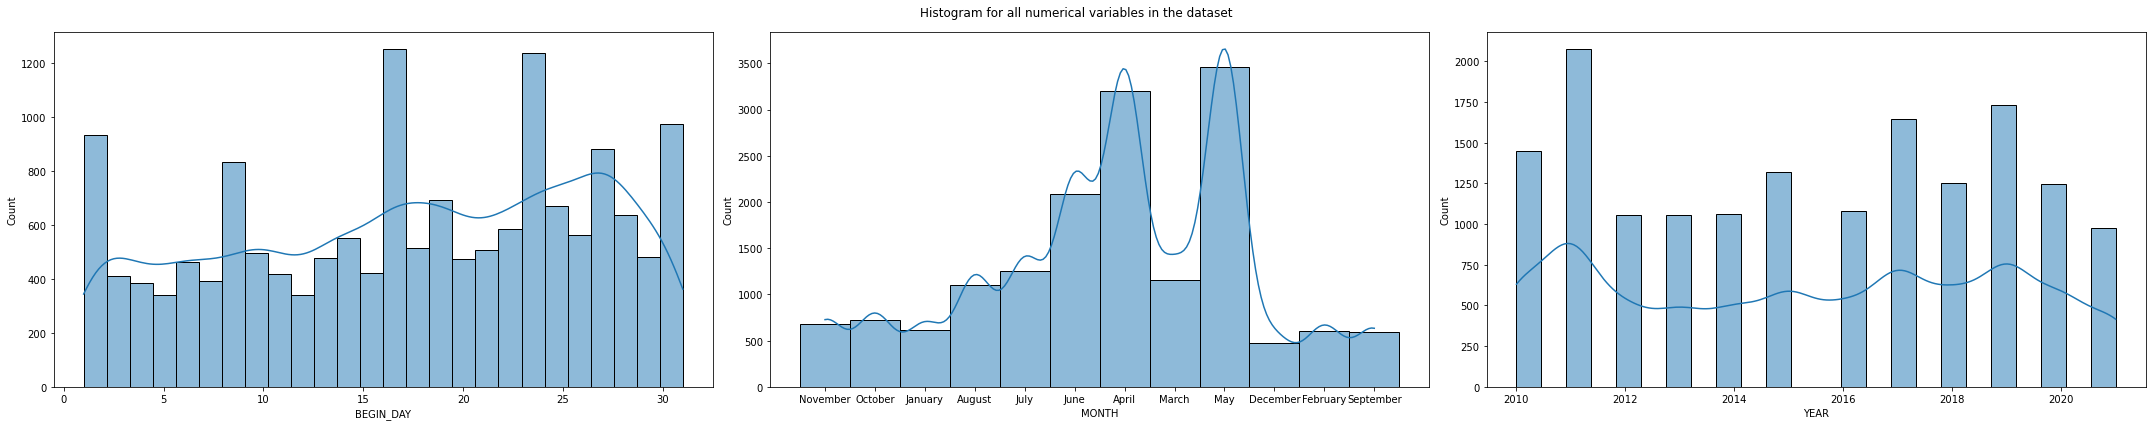

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
  
fig.suptitle('Histogram for all numerical variables in the dataset')
  
sns.histplot(x='BEGIN_DAY', data=df, kde=True, ax=axes[0]);
sns.histplot(x='MONTH', data=df, kde=True, ax=axes[1]);
sns.histplot(x='YEAR', data=df, kde=True, ax=axes[2]);

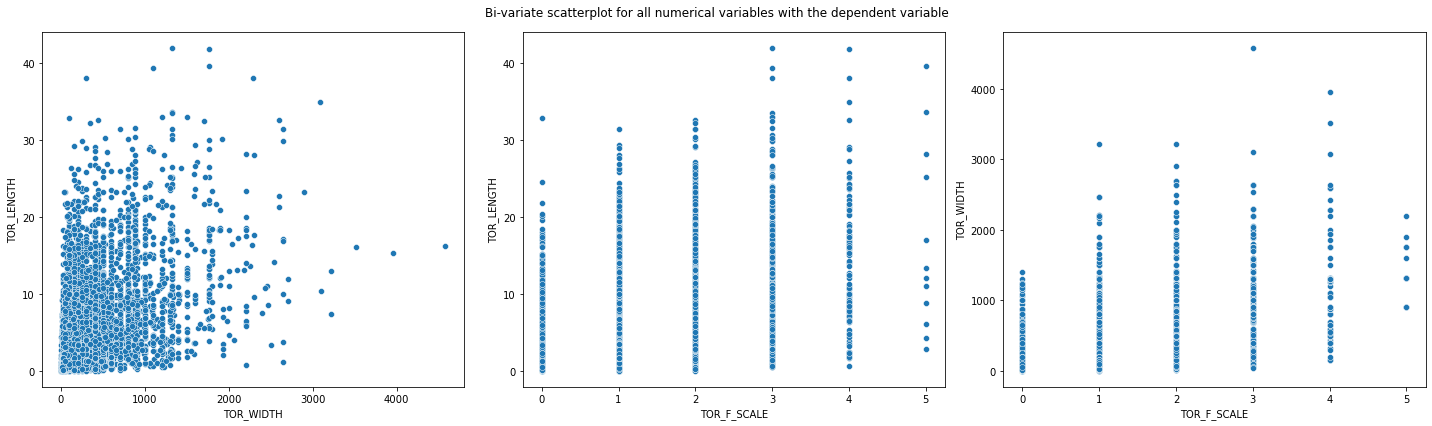

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  
fig.suptitle('Bi-variate scatterplot for all numerical variables with the dependent variable')
  
sns.scatterplot(x='TOR_WIDTH', y='TOR_LENGTH', data=df, ax=axes[0]);
sns.scatterplot(x='TOR_F_SCALE', y='TOR_LENGTH', data=df, ax=axes[1]);
sns.scatterplot(x='TOR_F_SCALE', y='TOR_WIDTH', data=df, ax=axes[2]);

### Observations:
 - In the scatter plot we can compare length to width on the tornadoes Max length in miles is > 40
 - Max width is > 4000 feet wide
 - We can also compare EF scale to length and width

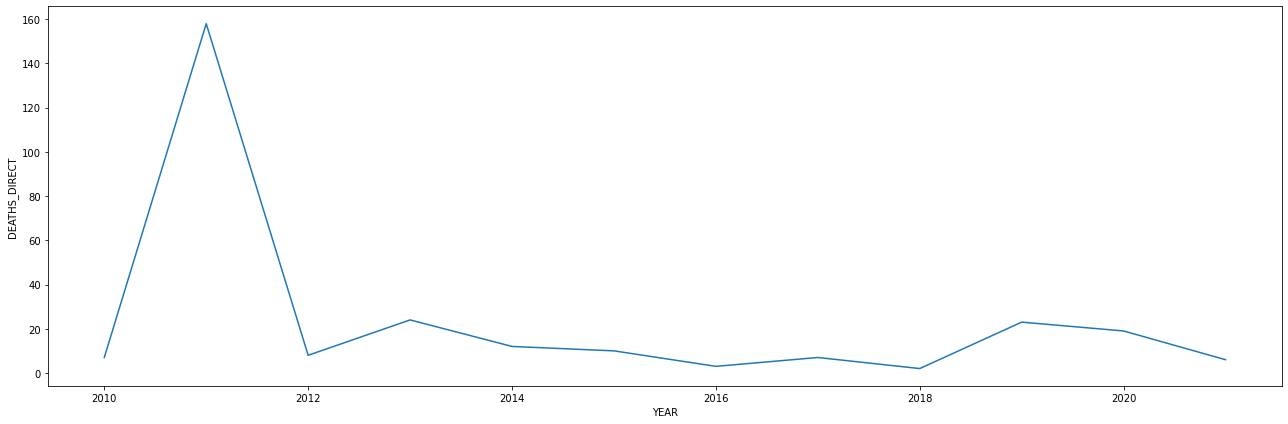

In [23]:
fig= plt.figure(figsize=(18, 6))
sns.lineplot(x='YEAR', y='DEATHS_DIRECT', data=df, ci=None, estimator='max');

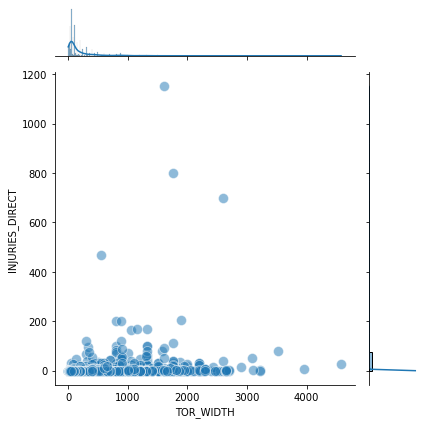

In [24]:
g = sns.JointGrid(data=df, x="TOR_WIDTH", y="INJURIES_DIRECT")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

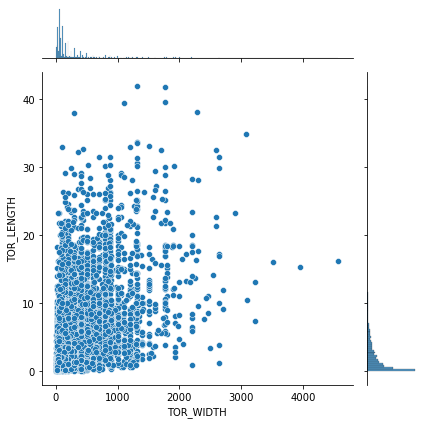

In [25]:
g = sns.JointGrid(data=df, x="TOR_WIDTH", y="TOR_LENGTH")
g.plot(sns.scatterplot, sns.histplot)

<AxesSubplot:xlabel='Density', ylabel='TOR_WIDTH'>

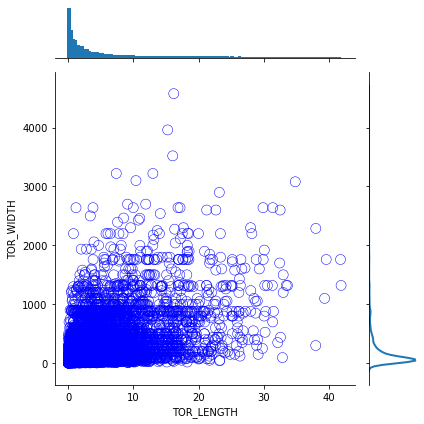

In [26]:
g = sns.JointGrid()
x, y = df["TOR_LENGTH"], df["TOR_WIDTH"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

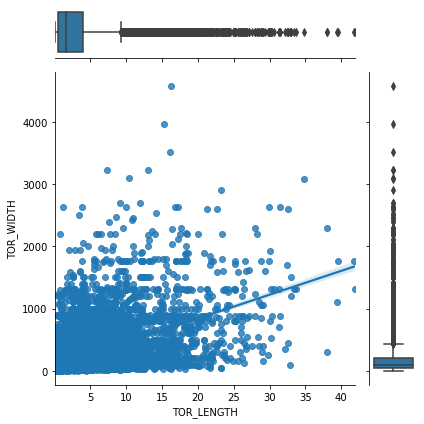

In [27]:
g = sns.JointGrid(data=df, x="TOR_LENGTH", y="TOR_WIDTH")
g.plot(sns.regplot, sns.boxplot)

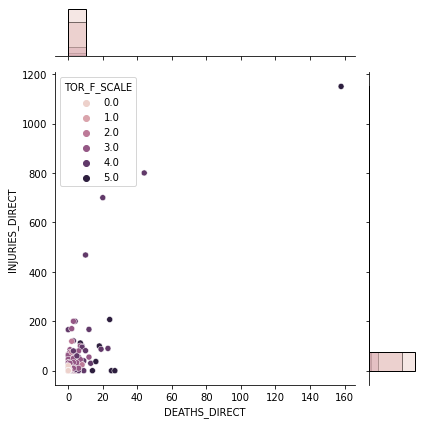

In [28]:
g = sns.JointGrid(data=df, x="DEATHS_DIRECT", y="INJURIES_DIRECT", hue="TOR_F_SCALE")
g.plot(sns.scatterplot, sns.histplot)

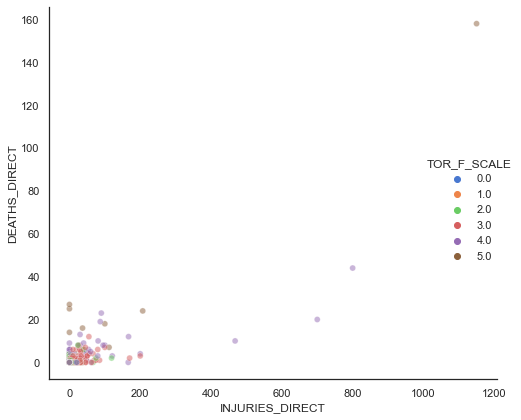

In [29]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="INJURIES_DIRECT", y="DEATHS_DIRECT", hue="TOR_F_SCALE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

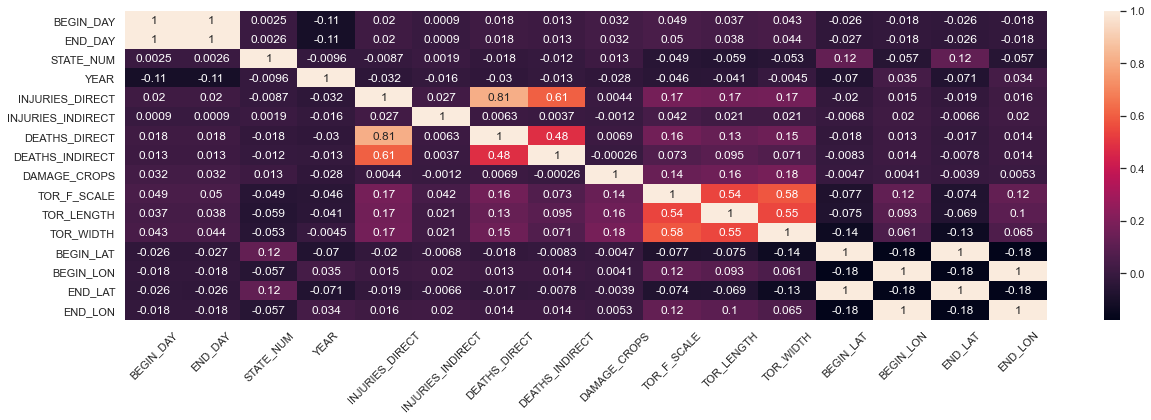

In [30]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45);

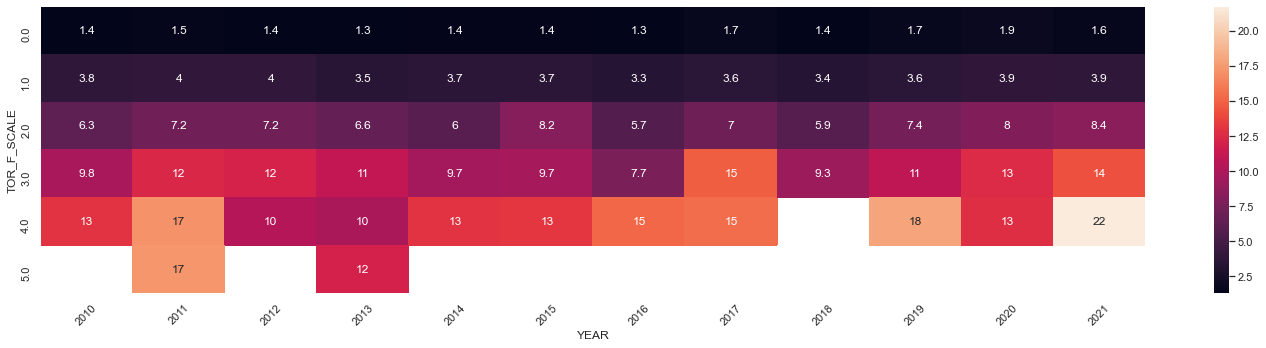

In [31]:
fig= plt.figure(figsize=(20, 5))
sns.heatmap(df.pivot_table(index='TOR_F_SCALE', columns='YEAR', values='TOR_LENGTH'), annot=True);
plt.xticks(rotation=45);

### US MAP

### Filtering data for information

In [32]:
# selecting rows based on condition grater than or less than
ef5_df = df[df['TOR_F_SCALE'] > 3] 
    
print('\nResult dataframe :\n', ef5_df)


Result dataframe :
        BEGIN_DAY  END_DAY           STATE  STATE_NUM  YEAR     MONTH  Tornado  \
3             29       29       LOUISIANA         22  2010  November  Tornado   
6              7        7    NORTH DAKOTA         38  2010    August  Tornado   
38             7        7       MINNESOTA         27  2010    August  Tornado   
516           24       24     MISSISSIPPI         28  2010     April  Tornado   
525           24       24     MISSISSIPPI         28  2010     April  Tornado   
...          ...      ...             ...        ...   ...       ...      ...   
14696         12       12     MISSISSIPPI         28  2020     April  Tornado   
14697         12       12     MISSISSIPPI         28  2020     April  Tornado   
14707         12       12     MISSISSIPPI         28  2020     April  Tornado   
14742         13       13  SOUTH CAROLINA         45  2020     April  Tornado   
15172         25       25         GEORGIA         13  2021     March  Tornado   

      

#### Above you can see we filtered all data that was for a EF5 tornado by ef5_df = df[df['TOR_F_SCALE'] > 4]   

# US MAP

In [33]:
import folium as folium

### Above we also created a new Data Frame called ef5_df that has the new filtered data this is > that ef4

In [34]:
def missing_check(ef5_df):
    total = ef5_df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (ef5_df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(ef5_df)

,Total,Percent
DAMAGE_CROPS,25,0.001567
DAMAGE_PROPERTY,21,0.001317
EPISODE_NARRATIVE,0,0.000000
END_LON,0,0.000000
END_LAT,0,0.000000
BEGIN_LON,0,0.000000
BEGIN_LAT,0,0.000000
END_LOCATION,0,0.000000
TOR_WIDTH,0,0.000000
TOR_LENGTH,0,0.000000


### Here we will create a new Data Frame called map_df with selected columns

In [35]:
map_df=ef5_df[['TOR_F_SCALE','BEGIN_LON','BEGIN_LAT','EVENT_NARRATIVE',"TOR_WIDTH","DEATHS_DIRECT"]].rename({'TOR_F_SCALE':'ef_scale','BEGIN_LON':'longitude','BEGIN_LAT':'latitude','EVENT_NARRATIVE':'info'}, axis=1)

In [36]:
map_df.head()

,ef_scale,longitude,latitude,info,TOR_WIDTH,DEATHS_DIRECT
3,4.0,-92.8080,31.7947,Numerous trees were snapped near the intersect...,400,0
6,4.0,-96.6300,46.1100,This tornado touched down south of Tyler and t...,600,0
38,4.0,-96.5630,46.1300,"This tornado began in Richland County, North D...",600,0
516,4.0,-90.1539,32.9456,The tornado continued northeast into rural sou...,2600,1
525,4.0,-90.6783,32.7003,The tornado moved out of extreme southeast Sha...,3080,4


In [37]:
m=folium.Map(
    location=[map_df["latitude"].mean(), map_df["longitude"].mean()],
    zoom_start=6)

map_df.apply(
    lambda row: folium.Marker(
        location=[row['latitude'], row['longitude']]
        ).add_to(m),
    axis=1)
m

In [38]:
# Beginning of Jopin Tornado

m = folium.Map(location=[37.0560, -94.5701], tiles="Stamen Terrain", zoom_start=13)

m.add_child(folium.LatLngPopup())
